## Chapter 6 Linear Regression
#### MA189 Statistics and Big Data in Birmingham (with R)
##### -- _Blazer Core: City as Classroom Series_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/)


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

##### <div class="alert alert-block alert-success"> Introduction </div>

As an introduction, consider the first 10 minutes of the following video from the UAB School of Public Health on Maternal Mortality Rates (maternal deaths per 100,000 live births) in the U.S. that emphasizes a major issue that this country is facing and highlights the racial inequity evident in these outcomes. (You are welcome to watch more to learn about how Maternal Mortality Committees are striving to improve health outcomes). 

[![Video: Alabama’s Maternal Mortality Crisis](https://www.youtube.com/watch?v=oEXDuGfLJvk)](https://www.youtube.com/watch?v=oEXDuGfLJvk)

To be able to to see the racial disparities bar graph shown in the talk a bit clearer, I include it here:


<p align="center">
    <img src="../pics/US MMR by race.png" alt="Figure 1" style="width:70%;"/>
</p>


Pairing this guest talk with the following bar graph, we see that the U.S. was (sadly) the leading country in maternal deaths for industrialized nations in 2018.


<p align="center">
    <img src="../pics/High_MMR_US.png" alt="Figure 1" style="width:70%;"/>
</p>


To highlight a bit closer to our area, consider the following data visualizations that emphasize the severity of the issue in the southeast region, and particularly in Alabama (maternal mortality per 100,000 live births // pregnancy-related mortality ratios). 


<p align="center">
    <img src="../pics/Southeast MMR 2018 cropped.png" alt="Figure 1" style="width:70%;"/>
</p>


<p align="center">
    <img src="../pics/Alabama MMR 2018-2021.png" alt="Figure 1" style="width:70%;"/>
</p>


So, what does this have to do with our chapter on linear regression? Consider the following infographic. 

<p align="center">
    <img src="../pics/US MMR line graph.png" alt="Figure 1" style="width:70%;"/>
</p>

We can see for this brief timeline that there is approximately a linear relationship between the year and the Maternal Mortality Rate. Later, you will find exactly what that relationship is in order to make some predictions and conclusions. 




-----

In case you are interested in practices of other countries, here's some more data and information to process for your enrichment! 

<p align="center">
    <img src="../pics/US price.png" alt="Figure 1" style="width:70%;"/>
</p>


<p align="center">
    <img src="../pics/Midwives.png" alt="Figure 1" style="width:70%;"/>
</p>

<p align="center">
    <img src="../pics/Midwives 2.png" alt="Figure 1" style="width:70%;"/>
</p>


<p align="center">
    <img src="../pics/Non-US Practices.png" alt="Figure 1" style="width:70%;"/>
</p>


<div class="alert alert-block alert-danger">
    <b>Application in Birmingham from Area of Public Health: Alabama's Maternal Mortality Health Crisis </b>
</div>

The Introduction section above comprising of a guest lecture by Dr. Martha S. Wingate from the UAB School of Public Helath on the Maternity Mortality Crisis here in the state of Alabama (ranking 4th with the highest maternal mortality rate in 2018-2021) provides a motivation for this chapter to investigate this trend more closely using linear regression. The information provided above also serves as a review for data visualization techniques we have discussed so far in this course.

### Simple Linear Regression

This refers to the modeling of a linear relationship between two variables.

##### <div class="alert alert-block alert-success"> Regression analysis </div>
* __Regression analysis__ is a statistical methodology to estimate the relationship of a response variable to a set of predictor variables.
* When there is just one predictor variable, we will use __simple linear regression__. When there are two or more predictor variables, we use __multiple linear regression__.
* When  it is not clear which variable represents a response and which is a predictor, __correlation analysis__ is used to study the strength of the relationship.



* Scatterplots are helpful to organize data visually between two quantitative variables with the $x$-axis as the explanatory (or predictor) variable and the $y$-axis as the response variable. 

  Form: linear (what we will focus on), parabolic, non-linear, very scattered <br>
  Strength: none, weak, moderate, strong<br>
  Outliers: unusal points, gaps <br>
  Strength of Association: if linear, positive (increases left to right) or negative (decreases left to right) <br><br>
  
  
* Correlation coefficient $r$: only appropriate for a linear association<br>
$-1\leq r\leq 1$<br>
Strong associations are close to -1 or 1; weak are close to 0<br>
$r>0$ means positive association; $r<0$ means negative association<br>

Note: 
An $r$ value with magnitude of 0.8 or greater represents a strong association between the predictor and response variables.




<div class="alert alert-block alert-danger">
<b>Application</b>: Sales and Advertising Budget
</div>

In lab, you will use the `marketing` dataset from `datarium` (Data Bank for Statistical Analysis and Visualization) package. It contains the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times with different budgets and the observed sales have been recorded. We may be interested to see if there is a strong enough relationship between advertising budgets and `sales`  to investigate further with regression analysis. We will begin with just one advertising budget category (`youtube`) to begin with a one predictor variable case (so that it's simple linear regression). 

The scatterplot given below shows the relationship between the advertising budget on youtube to sales with a calculated correlation coefficient between the two variables being about $r=0.8$. It shows there is a strong correlation between the `youtube` advertising budget and `sales` which is preliminary work to justify performing a simple linear regression analysis.



<p align="center">
    <img src="../pics/youtube sales scatterplot.png" alt="Figure 1" style="width:70%;"/>
</p>


##### <div class="alert alert-block alert-info"> Short history </div>
* The earliest form of linear regression was the method of least squares, which was published by _Legendre_ in 1805, and by _Gauss_ in 1809. 
* The method was extended by _Francis Galton_ in the 19th century to describe a biological phenomenon.
* This work was extended by _Karl Pearson_ and _Udny Yule_ to a more general statistical context around 20th century.



##### <div class="alert alert-block alert-success">Least Squares Line</div>

This is a method used to find the best fit line within a linear regression model by minimizing the sum of squared errors between the data points and the line. 

Specific notation of the __predictor variable ($x$)__ and
corresponding values of the __response variable ($Y$)__
* data: $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$.
* $y_i$: observed value of the random variable $Y_i$ based on $x_i$.

The least squares regression line requires that the sum of squares of the vertical distances from the data points $(x_i,y_i)$ to the line is as small as possible. In other words, this is a line of best fit by taking into account all of the data points - so it is not resistant to outliers.

* The __residual__ is the difference between the actual value and the predicted value on the regression line. <br>
* The __slope__ is the amount that the response variable on the regression line changes when the predictor variable changes by 1 unit. <br>
* The $y$-intercept is the predicted value of the response variable on the regression line when the predictor variable is 0. <br>
* The regression line passes through the point $(\bar{x},\bar{y})$.<br>

* __Interpolating__ is predicting the value of the response variable for predictor values that are *in between* observed values. <br>
* __Extrapolating__ is predicting the value of the response variable for predictor values that are *beyond* observed values. <br>

* __*r*$^2$__ is the square of the sample correlation coefficient and it represents the proportion of variation in the response variable that can be explained by the variation in the predictor variable using the least squares regression line. 

Notes: 
* Extrapolating can produce unrealistic forecasts. <br>
* Association (or correlation) does NOT imply causation. <br>


The regression line which is the best estimate considering all of the data points is given by:
\begin{equation}
\hat y=a + b x
\end{equation}




<div class="alert alert-block alert-danger">
<b>Local Example</b>: Least Squares Regression Line 
</div>

The following graph has data points plotted for the total COVID-19 cases in Alabama for certain dates in 2020 (based on number of days after March 29th, 2020 where March 29th is considered day 1 and April 7th day 10). The least squares regression line is plotted to show the best fit of a line that explains the relationship between time and COVID-19 cases for Alabama in this timeframe. 


<p align="center">
    <img src="../pics/AL COVID.png" alt="Figure 1" style="width:70%;"/>
</p>

Why is the linear regression line helpful or important to know?

#### Your answer:

<div class="alert alert-block alert-danger">
    <b>Student Application Practice:</b> US Maternal Mortality Rates
</div>

Consider the information provided at the beginning of this chapter regarding Maternal Mortality Rates. Now, let's dive into the following report from the CDC on Maternal Mortality Rates (MMR) from 2018-2022 (page 6). 
https://www.cdc.gov/nchs/data/hestat/maternal-mortality/2022/maternal-mortality-rates-2022.pdf

1. Find the linear regression line that approximates the trend of MMR from 2018-2022.
2. What is the explanatory variable?
3. What is the response variable?
4. True or False: The regression line from 2018-2022 proves that the passing of time causes the MMR to increase. 
5. What is the slope of the regression line? What does this mean in this context?
6. What is the $y$-intercept of the regression line? What does this mean in this context?
7. Use your equation of the regression line to predict the MMR for the year 2023. Is it reasonable to do this?
8. Use your equation of the regression line to predict the MMR for the year 2044. Is it reasonable to do this?
9. Predict the year when the MMR is 40. (Let's hope this doesn't happen).









Call:
lm(formula = rate ~ year)

Coefficients:
(Intercept)         year  
      18.78         2.26  


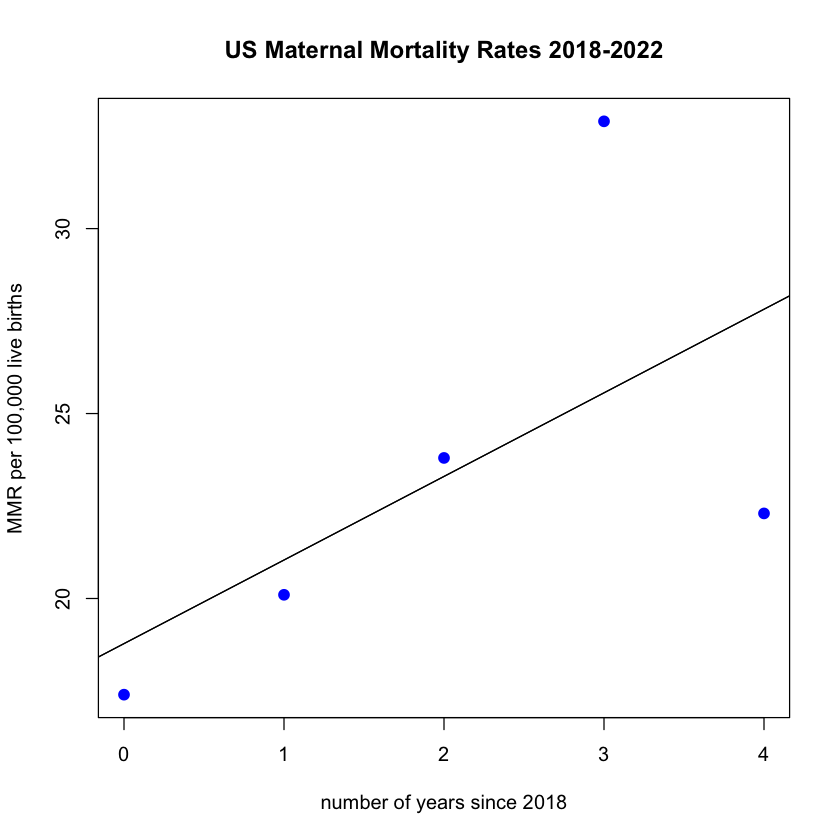

In [10]:
#finding regression line 
year <- c(0, 1, 2, 3, 4) #represents year since 2018
rate <- c(17.4, 20.1, 23.8, 32.9, 22.3)
plot(year, rate, pch = 16, cex = 1.3, col = "blue", main = "US Maternal Mortality Rates 2018-2022", xlab="number of years since 2018", ylab="MMR per 100,000 live births")
lm(rate ~ year)
abline(18.78, 2.26)
abline(lm(rate ~ year))

#### Your Answer:

### Regression Inference

##### <div class="alert alert-block alert-success">Overview and Conditions </div>

When we see a linear relationship between variables on a scatterplot, if data are from a larger population, we need statistical inference to answer questions like: 
- Is there really a linear relationship between $x$ and $y$ in the population or did the relationship in the scatterplot arise by chance? (i.e. want to test if it is a statistically significant linear relationship) 
- What is the slope, including a margin of error for the estimate of the slope?
- How accurate is our least-squares line with a margin of error? 

Process of inference for a population: think about $a$ and $b$ as statistics (they are the slope and intercept based on a small sample of data but with a different set of data, may have different values so they are estimates or sample statistics of unknown parameters that describe the entire population of interest). 

Conditions for Regression Inference 
* For a fixed value of $x$, the response variable $y$ varies according to a normal distribution and repeated $y$ values are independent of each other. 
* The mean response, $\mu$, has a linear relationship with $x$ given by a population regression line: $\mu=\alpha+\beta x$ where $\alpha$ and $\beta$ are unknown. (In other words, the mean of the response variable $y$ moves along this line as the explanatory variable $x$ takes different values).
* The standard deviation of the response variable $y$ (call it $\sigma$) is unknown and is the same for all values of $x$. 


<p align="center">
    <img src="../pics/regression sd.jpg" alt="Figure 1" style="width:70%;"/>
</p>


So, we must estimate 3 population parameters from the data: $a$, $\beta$, and $\sigma.$ We can use our least squares regression line to estimate $\alpha$ (which is $a$) and $\beta$ (which is $b$) so we still need to estimate $\sigma.$


The least squares line estimates the population regression line. So the residuals (error from data points to line: $y_i- \hat y_i$) measures how much $y$ varies about the population regression line and there are $n$ of them (for each data point). 

Therefore, we estimate $\sigma$ (the standard deviation of responses about the population regression line) by a sample standard deviation of residuals, called __regression standard error__ (or __residual standard error__):
$RSE=\sqrt{\frac{1}{n-2}\Sigma(y_i-\hat y_i)^2}$  

* Result: An unbiased estimate of $\sigma^2$ is given by

\begin{equation}
\hat\sigma^2=\frac{1}{n-2}\Sigma(y_i-\hat y_i)^2
\end{equation}




##### <div class="alert alert-block alert-warning">Summary outputs</div>

We can display the statistical summary of the regression model via R function `summary()`.


<p align="center">
    <img src="../pics/summary model.png" alt="Figure 1" style="width:70%;"/>
</p>

##### <div class="alert alert-block alert-success">Statistical Summary Table</div>
    
* Call. Shows the function call used to compute the regression model.
* __Residuals__ (error). Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.
* __Residual standard error__ (RSE) is the residual variation, representing the average variation of the observation points around the fitted regression line. This is the standard deviation of residual errors.

    $RSE=\sqrt{\frac{1}{n-2}\Sigma(y_i-\hat y_i)^2}$  
    
    In our example, $RSE = 3.91$, meaning that the observed sales values deviate from the true regression line by approximately 3.9 units in average.
    
* __R-squared__ ($R^2$). 

    A high value of $R^2$ is a good indication. However, as the value of $R^2$ tends to increase when more predictors are added in the model, such as in multiple linear regression model, you should mainly consider the adjusted R-squared, which is a penalized $R^2$ for a higher number of predictors.
    
* __$F$-statistic__ 

    The $F$-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient. In a simple linear regression, this test is not really interesting since it just duplicates the information given by the $t$-test, available in the coefficient table.  In fact, the F test is identical to the square of the $t$-test: $312.1 = (17.67)^2$. This is true in any model with 1 degree of freedom.
    
    
##### <div class="alert alert-block alert-success">Coefficients Table </div>
* __Coefficients__. Shows the regression coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.
* The __estimates__ of the coefficients ($a$ and $b$)
* The __standard errors__ (SE), which defines the accuracy of regression coefficients. For a given regression coefficient, the SE reflects how the coefficient varies under repeated sampling. It can be used to compute the confidence intervals and the t-statistic.
    Given significance level $\alpha=0.05$, the $95\%$ confidence interval of $\beta_i$ is $(\hat\beta_i \pm 1.96 SE(\hat\beta_i)), i=1,2$ where $\beta$ represents $a$ or $b$. 
    
* The __t-statistic__ and the associated __p-value__, which defines the statistical significance of the coefficients ($a$ and $b$).

    The symbols to the right visually specifies the level of significance. The line below the table shows the definition of these symbols; one star means $0.01 < p < 0.05$. The more the stars beside the variable’s $p$-value, the more significant the variable.

In [7]:
confint(model)

,2.5 %,97.5 %
(Intercept),7.35566312,9.52256140
youtube,0.04223072,0.05284256


##### <div class="alert alert-block alert-success">Coefficient of determination</div>

*  The coefficient of determination ($R^2$) explains the percentage of the variation in response variable ($Y$) is accounted for by linear regression on the explanatory variable ($x$).

* $R^2$ is the square of the sample linear correlation coefficient ($r$)
\begin{equation}
0 \leq R^2 = r^2 \leq 1
\end{equation}

Sometimes, capital $R$ is used for muiltiple linear regression only but here it's used in the summary output for simple linear regression, as well.

<div class="alert alert-block alert-danger">
    <b>Student Application Practice:</b> US Maternal Mortality Rates (continued)
</div>

1. Determine $r^2.$ What is the strength and association of the relationship? What does $r^2$ mean in this context?
2. Determine the residual standard error for the US Maternal Mortality Rates (compared to the regression line we modeled this data with previously). 


Call:
lm(formula = rate ~ year)

Residuals:
    1     2     3     4     5 
-1.38 -0.94  0.50  7.34 -5.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   18.780      4.181   4.492   0.0206 *
year           2.260      1.707   1.324   0.2773  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.397 on 3 degrees of freedom
Multiple R-squared:  0.3689,	Adjusted R-squared:  0.1585 
F-statistic: 1.754 on 1 and 3 DF,  p-value: 0.2773


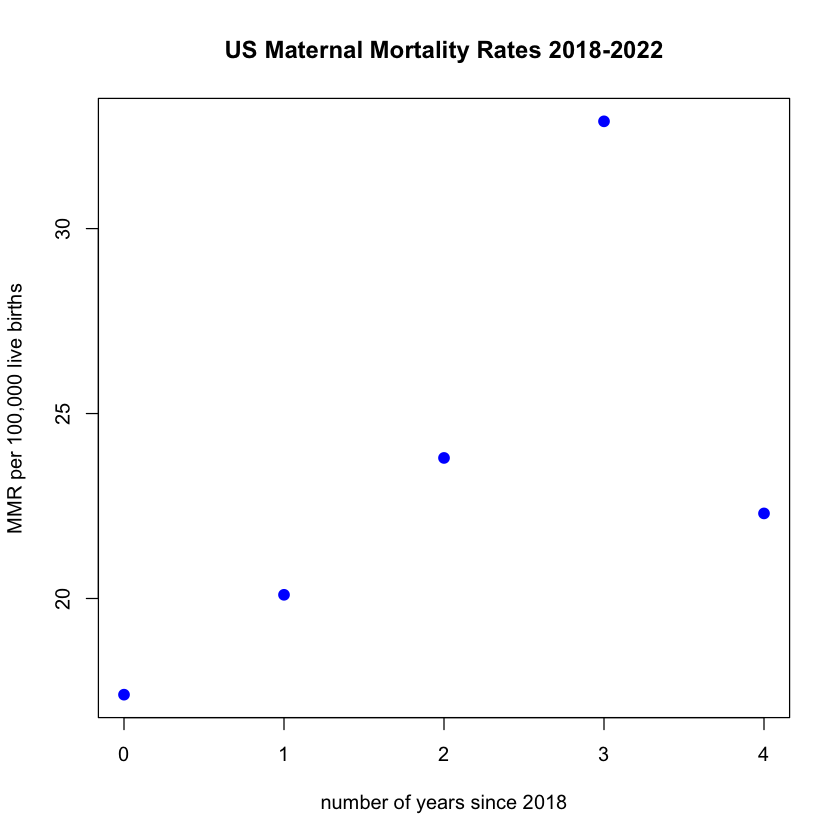

In [9]:
#finding regression line 
year <- c(0, 1, 2, 3, 4) #represents year since 2018
rate <- c(17.4, 20.1, 23.8, 32.9, 22.3)
plot(year, rate, pch = 16, cex = 1.3, col = "blue", main = "US Maternal Mortality Rates 2018-2022", xlab="number of years since 2018", ylab="MMR per 100,000 live births")
model <- lm(rate ~ year)

summary(model)


#### Your Answer:

##### <div class="alert alert-block alert-warning">Checking for model assumptions</div>

Consider below a histogram representing frequency of residual values, as well as a scatterplot with residuals in relation to the regression line oriented horizontally (residual equaling zero). 

<p align="center">
    <img src="../pics/residual histogram 1.png" alt="Figure 1" style="width:70%;"/>
</p>


<p align="center">
    <img src="../pics/residual scatterplot 1.png" alt="Figure 1" style="width:70%;"/>
</p>




* Checking for Linearity: ex. residual plot (and initial scatterplot) show linear relationship except for outlier
* Checking for Normality: ex. histogram is roughly symmetric and single peaked; looks like normal distribution besides outlier
* Checking for Constant Variance: ex. residual plot shows no unusual variation in the scatter of the residuals above and below the line as $x$ varies, except for outlier
* Checking for Independence: ex. observations taken independently throughout time; no pattern of dependence emerges such as all points above or below the line in residual plot
    * Does not apply for Simple Linear Regression Model
    * Only applies for time series data

##### <div class="alert alert-block alert-success"> Outliers and influential points</div>

General discussion.

* What is an outlier?
* Why is checking for outliers is important? 
* How to deal with outliers?
    * Investigate (Data errors? Rare events? Can it be corrected or removed?) 
    * Ways to accommodate outliers
        - Nonparametric Methods (robust to outliers) 
        - Data Transformations
        - Deletion (or report model results both with and without the outliers or influential observations to see how much they change)

##### <div class="alert alert-block alert-info"> Data Transformations </div> 

Determining if model needs to be improved to get something beyond linear (initial attempts for nonlinear).

* Reasons
    * To achieve linearity
    * To achieve homogeneity of variance
    * To achieve normality or symmetry about the regression equation
* Method of linearizing transformation
    * Use mathematical operation, e.g. square root, power, log, exponential, etc.
    * In the simple linear regression, which one variable needs to be transformed? Predictor or response? Why?

##### <div class="alert alert-block alert-info"> Statistical inference on $\hat a$ and $\hat b$</div>


* Point estimators: $\hat a=\bar y -\hat b \bar x, \hat b=\frac{S_{xy}}{S_{xx}}$
* Sampling distributions:

$
\begin{align}
\hat a &\sim N\left( a, \frac{\sum_{i=1}^n x_i^2}{n S_{xx}} \sigma^2\right)\\
\hat b &\sim N\left( b, \frac{1}{S_{xx}} \sigma^2\right)
\end{align}
$

* Standard error (SE) is a measure of the standard deviation of the errors in a regression model. It measures the variability/accuracy of the regression coefficients.

$
\begin{align}
SE(\hat a)^2 &= \sqrt{\frac{\sum_{i=1}^n x_i^2}{n S_{xx}} MSE}\\
SE(\hat b)^2 &= \sqrt{\frac{MSE}{S_{xx}}}
\end{align}
$


##### <div class="alert alert-block alert-info"> Goodness of Fit of the Least Squares Line </div>


We have that 

\begin{equation}
\hat y_i=\hat a+ \hat b x_i, i=1,2,\dots,n, 
\end{equation}

so 
\begin{equation}
y_i=\hat a+ \hat b x_i + e_i, i=1,2,\dots,n, 
\end{equation}


where the random errors $e_i$ are approximately normally distributed and independent.

##### Decomposition of sum squares </div>
* The residuals: $e_i=y_i-\hat{y}_i=y_i-(\hat a+\hat b x_i), i=1,\dots,n$.
* Decomposition of Sum Squares: 
\begin{align}
SST&=&\sum_{i=1}^n (y_i-\bar y)^2 \\
&=&\sum_{i=1}^n (\hat{y}_i-\bar y)^2 &+&  \sum_{i=1}^n (y_i-\hat{y}_i)^2 &+& 2 \sum_{i=1}^n (\hat{y}_i-\bar y) (y_i-\hat{y}_i)\\
&=&SSR &+&  SSE &+& 0
\end{align}
* __Sum of Squares of Total (SST)__: total variation of the observed dependent variables around the mean.
* __Sum of Squares of Regression (SSR)__: variation of the observed dependent variables explained by the regression model.
* __Sum of Squares of Errors (SSE)__: discripancy of variations between the observed value and the predicted value.

##### <div class="alert alert-block alert-info"> Least Squares Estimate</div>


The "best" fitting straight line in the sense of minimizing least squares criterion (data - regression estimate):
\begin{equation}
\sum_{i=1}^n [y_i-(a+b x_i)]^2
\end{equation}

__Normal equation__
\begin{align}
an + b \sum_{i=1}^n x_i &=\sum_{i=1}^n y_i\\
a \sum_{i=1}^n x_i + b \sum_{i=1}^n x_i^2 &=\sum_{i=1}^n x_i y_i
\end{align}

__Least square estimators (LSE) of $a$ and $b$__

$
\begin{align}
\hat a &= [(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i)-(\sum_{i=1}^n x_i)(\sum_{i=1}^n x_i y_i)]/[n\sum_{i=1}^n x_i^2- (\sum_{i=1}^n x_i)^2] \\
\hat b &= [n\sum_{i=1}^n x_i y_i-(\sum_{i=1}^n x_i)(\sum_{i=1}^n y_i)]/[n\sum_{i=1}^n x_i^2- (\sum_{i=1}^n x_i)^2]
\end{align}
$

<span style='background:lightblue'> Note:  </span>

_Under normal assumption of the errors, Maximum Likelihood Estimators (MLE) of $a$ and $b$ equal Least square estimators of $a$ and $b$._

Denote 

$
\begin{align}
S_{xy} &= \sum_{i=1}^n (x_i-\bar x)(y_i-\bar y) = \sum_{i=1}^n x_i y_i - \frac{1}{n} (\sum_{i=1}^n x_i)(\sum_{i=1}^n y_i)\\
S_{xx} &= \sum_{i=1}^n (x_i-\bar x)^2 = \sum_{i=1}^n x_i^2 - \frac{1}{n} (\sum_{i=1}^n x_i)^2\\
S_{yy} &= \sum_{i=1}^n (y_i-\bar y)^2 = \sum_{i=1}^n y_i^2 - \frac{1}{n} (\sum_{i=1}^n y_i)^2
\end{align}
$

Coefficient LSE: 

$
\begin{align}
\hat a=\bar y -\hat b \bar x, \hat b=\frac{S_{xy}}{S_{xx}}
\end{align}
$



##### <div class="alert alert-block alert-info"> Coefficient of Determination </div>

*  $R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}$.

* $R^2$ is the square of the sample linear correlation coefficient ($r$)
\begin{equation}
0 \leq R^2 = r^2 = \frac{S_{xy}^2}{S_{xx} S_{yy}} \leq 1
\end{equation}

##### <div class="alert alert-block alert-info"> Testing Hypothesis on $\hat\beta_0$ and $\hat\beta_1$</div>



  $H_0: \beta_1=\beta_1^0$ vs $H_a: \beta_1 \neq \beta_1^0$ </br>
  or $H_0: \beta_1=0$ vs $H_a: \beta_1 \neq 0$

* Test statistic: 
\begin{align}
T=\frac{\hat\beta_1-\beta_1^0}{SE(\hat\beta_1)}
\end{align}
* At the significance level $\alpha$, we reject $H_0$ in favorof $H_a$ </br>
    iff $|T| > t_{\alpha/2}(n-2)$
* Can be used to show whether there is a linear relationship between $x$ and $Y$.
* The higher the t-statistic (and the lower the p-value), the more significant the predictor.

##### <div class="alert alert-block alert-info"> Residual check</div> 

Plotting figures to determine whether the model and assumptions are appropriate. 

* Model checking by residual plots: 
    1. residual vs fitted value: $e_i$ vs $Y_i$ 
    2. residual vs explanatory variable: $e_i$ vs $x_i$ 
    3. residual vs lag of residual: $e_i$ vs $e_{i-1}$
* Transformation
    1. Boxcox transformation for skewed distribution 
    2. log transformation
    3. square root transformation
* Correlation of residuals
    1. correlation coefficient
    2. Durbin-Watson Statistic (series)